![title](logo.png)

   #          DATA                                        ANALYSIS

This is an exploratory data analysis of the German Football League (Bundesliga) since 1963. The dataset was extracted from 57 wikipedia pages. Each page was corresponding to one season's details, and was scraped with the open source tool: ParseHub

Being an avid football fan, I've been wanting to do this project for months. After the wonderful journey of one of my favorite football club (FC Bayern Munich) in the European Champions League, I decided to pay tribute to the team I've been cheering for since I was 9 years old by analyzing their national championship. So pick up your ball and follow me to the field of Data Analysis and as a renowned catchphrase for the team says: "Packmas" which is a Bavarian phrase for the German "Packen wir es", which means "let's do it" ;)

In [1]:
#Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [2]:
#Load the dataset and preview of the 10 first rows
df= pd.read_csv('bundesliga.csv')
df.head()

,team_selection1,team_position,team_name,team_points,team_played,team_win,team_draw,team_loss,team_goals_for,team_goals_against
0,1963–64 Bundesliga,1,1. FC Köln,45,30,17,11,2,78,40
1,1963–64 Bundesliga,2,Meidericher SV,39,30,13,13,4,60,36
2,1963–64 Bundesliga,3,Eintracht Frankfurt,39,30,16,7,7,65,41
3,1963–64 Bundesliga,4,Borussia Dortmund,33,30,14,5,11,73,57
4,1963–64 Bundesliga,5,VfB Stuttgart,33,30,13,7,10,48,40


In [3]:
#Preview of the 10 last rows
df.tail()

,team_selection1,team_position,team_name,team_points,team_played,team_win,team_draw,team_loss,team_goals_for,team_goals_against
1019,2019–20 Bundesliga,14,1. FC Köln,36,34,10,6,18,51,69
1020,2019–20 Bundesliga,15,FC Augsburg,36,34,9,9,16,45,63
1021,2019–20 Bundesliga,16,Werder Bremen,31,34,8,7,19,42,69
1022,2019–20 Bundesliga,17,Fortuna Düsseldorf,30,34,6,12,16,36,67
1023,2019–20 Bundesliga,18,SC Paderborn,20,34,4,8,22,37,74


In [4]:
#Number of rows and columns
df.shape

(1024, 10)

### Renaming the columns


In [5]:
df.columns

Index(['team_selection1', 'team_position', 'team_name', 'team_points',
       'team_played', 'team_win', 'team_draw', 'team_loss', 'team_goals_for',
       'team_goals_against'],
      dtype='object')

In [6]:
df = df.rename(columns={'team_selection1' :'season', 'team_position': 'position', 'team_name': 'club', 'team_points':'points',
       'team_played':'played', 'team_win': 'win', 'team_draw': 'draw', 'team_loss':'loss', 'team_goals_for': 'GF',
       'team_goals_against':'GA'})
df.head()

,season,position,club,points,played,win,draw,loss,GF,GA
0,1963–64 Bundesliga,1,1. FC Köln,45,30,17,11,2,78,40
1,1963–64 Bundesliga,2,Meidericher SV,39,30,13,13,4,60,36
2,1963–64 Bundesliga,3,Eintracht Frankfurt,39,30,16,7,7,65,41
3,1963–64 Bundesliga,4,Borussia Dortmund,33,30,14,5,11,73,57
4,1963–64 Bundesliga,5,VfB Stuttgart,33,30,13,7,10,48,40


In [7]:
#create GD: goal difference column
df['GD']= df['GF']-df['GA']
df.head()

,season,position,club,points,played,win,draw,loss,GF,GA,GD
0,1963–64 Bundesliga,1,1. FC Köln,45,30,17,11,2,78,40,38
1,1963–64 Bundesliga,2,Meidericher SV,39,30,13,13,4,60,36,24
2,1963–64 Bundesliga,3,Eintracht Frankfurt,39,30,16,7,7,65,41,24
3,1963–64 Bundesliga,4,Borussia Dortmund,33,30,14,5,11,73,57,16
4,1963–64 Bundesliga,5,VfB Stuttgart,33,30,13,7,10,48,40,8


In [8]:
#Quick stats
df.describe()

,position,played,win,draw,loss,GF,GA,GD
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,9.488281,33.919922,12.620117,8.694336,12.605469,51.909180,51.875977,0.033203
std,5.190398,1.391720,4.422818,2.793885,4.346054,13.958553,12.569309,21.615879
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-93.000000
25%,5.000000,34.000000,9.000000,7.000000,10.000000,42.000000,43.000000,-14.000000
50%,9.000000,34.000000,12.000000,9.000000,13.000000,49.000000,51.000000,-2.000000
75%,14.000000,34.000000,15.000000,11.000000,15.000000,61.000000,60.000000,13.000000
max,20.000000,38.000000,29.000000,18.000000,28.000000,101.000000,108.000000,80.000000


<AxesSubplot:>

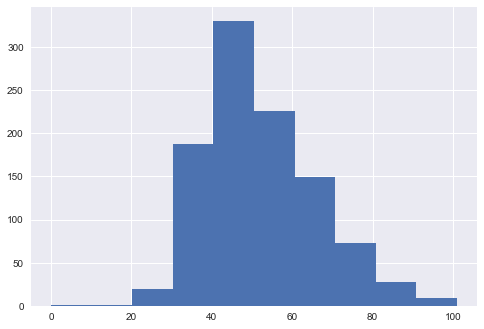

In [9]:
df['GF'].hist()

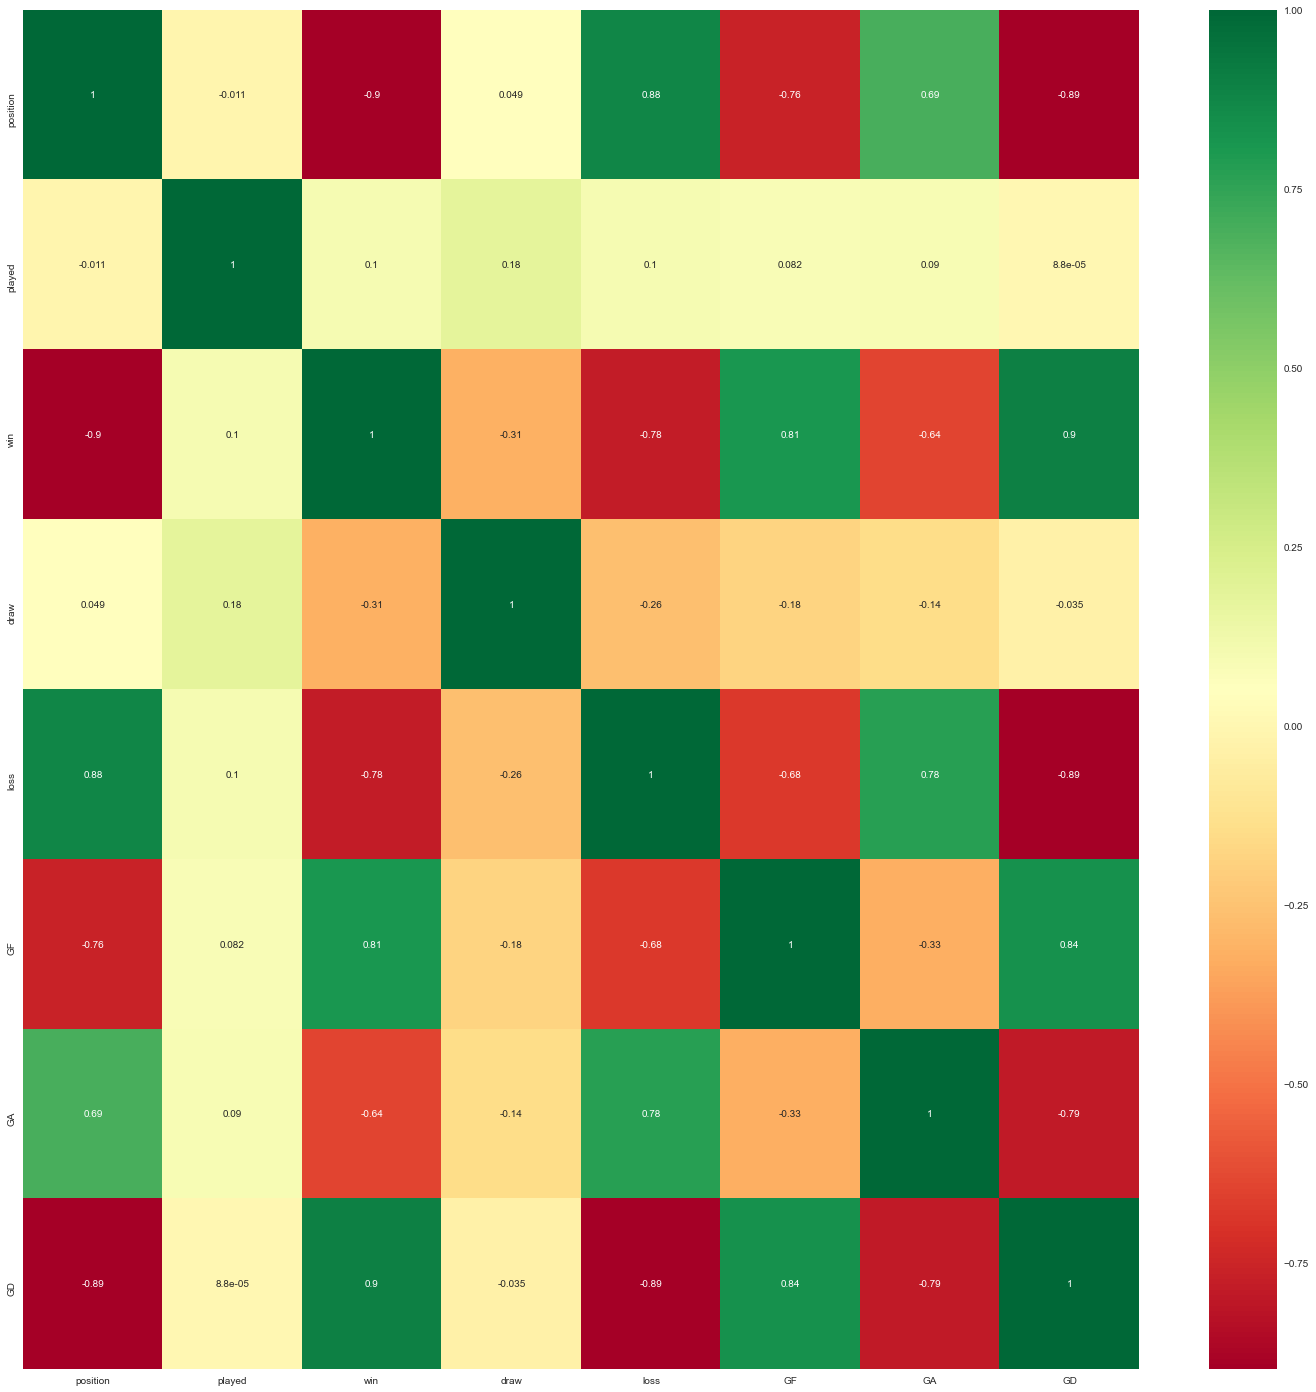

In [10]:
#correlation
plt.figure(figsize=(25,25))
hm= sns.heatmap(df.corr(), annot= True, cmap= "RdYlGn")

You can clearly see the correlation between the position and number of wins, losses, draws

### Checking if I have different names for the same club

In [9]:
df['club'].unique()

array(['1. FC Köln', 'Meidericher SV', 'Eintracht Frankfurt',
       'Borussia Dortmund', 'VfB Stuttgart', 'Hamburger SV',
       'TSV 1860 Munich', 'FC Schalke 04', '1. FC Nürnberg',
       'SV Werder Bremen', 'Eintracht Braunschweig',
       '1. FC Kaiserslautern', 'Karlsruher SC', 'Hertha BSC',
       'SC Preußen Münster', '1. FC Saarbrücken', 'Hannover 96',
       'Borussia Neunkirchen', 'TSV 1860 München', 'FC Bayern Munich',
       'Borussia Mönchengladbach', 'Tasmania Berlin', '1860 Munich',
       'Bayern Munich', 'MSV Duisburg', 'Schalke 04', 'Werder Bremen',
       'Fortuna Düsseldorf', 'Rot-Weiss Essen', 'Alemannia Aachen',
       'Kickers Offenbach', 'Rot-Weiß Oberhausen', 'Arminia Bielefeld',
       'VfL Bochum', 'Wuppertaler SV', 'Fortuna Köln',
       'Tennis Borussia Berlin', 'Bayer 05 Uerdingen', 'FC St. Pauli',
       'SV Darmstadt 98', 'Bayer Leverkusen', 'Darmstadt 98',
       'Waldhof Mannheim', 'FC Homburg', 'Blau-Weiß 90 Berlin',
       'Stuttgarter Kickers', 'FC

I noticed that some club names have changed through the years  
Let's create a dictionary and apply it to the club column

In [10]:
#All the different names
#TSV 1860 Munich = 1860 Munich= TSV1860 Munchen
#'Meidericher SV' = 'MSV Duisburg'
# Werder Bremen = SV Werder Bremen
# FC Bayern München = 'Bayern' = Bayern Munich
# FC Schalke 04 = Schalke 04
# SV Darmstadt = Darmstadt 98
# FC Homburg = FC 08 Homburg
# KFC Uerdingen = Bayer 05 Uerdinge
# Mainz 05 = FSV Mainz 05
#Paderborn 07 = SC Paderborn

In [11]:
final_names = {'1860 Munich': 'TSV 1860 Munich', 'TSV 1860 München': 'TSV 1860 Munich', 'Meidericher SV': 'MSV Duisburg',
              'SV Werder Bremen': 'Werder Bremen', 'Bayern': 'FC Bayern München', 'Bayern Munich': 'FC Bayern München',
              'Schalke 04' : 'FC Schalke 04', 'Darmstadt 98': 'SV Darmstadt', 'FC Homburg': 'FC 08 Homburg',
              'Bayer 05 Uerdingen': 'KFC Uerdingen', 'Mainz 05': 'FSV Mainz 05', 'SC Paderborn': 'SC Paderborn 07'}

df.club.replace(final_names, inplace=True)

### Creation of a city column for each club


In [12]:
#Get the list of all clubs
df['club'].unique()

array(['1. FC Köln', 'MSV Duisburg', 'Eintracht Frankfurt',
       'Borussia Dortmund', 'VfB Stuttgart', 'Hamburger SV',
       'TSV 1860 Munich', 'FC Schalke 04', '1. FC Nürnberg',
       'Werder Bremen', 'Eintracht Braunschweig', '1. FC Kaiserslautern',
       'Karlsruher SC', 'Hertha BSC', 'SC Preußen Münster',
       '1. FC Saarbrücken', 'Hannover 96', 'Borussia Neunkirchen',
       'FC Bayern Munich', 'Borussia Mönchengladbach', 'Tasmania Berlin',
       'FC Bayern München', 'Fortuna Düsseldorf', 'Rot-Weiss Essen',
       'Alemannia Aachen', 'Kickers Offenbach', 'Rot-Weiß Oberhausen',
       'Arminia Bielefeld', 'VfL Bochum', 'Wuppertaler SV',
       'Fortuna Köln', 'Tennis Borussia Berlin', 'KFC Uerdingen',
       'FC St. Pauli', 'SV Darmstadt 98', 'Bayer Leverkusen',
       'SV Darmstadt', 'Waldhof Mannheim', 'FC 08 Homburg',
       'Blau-Weiß 90 Berlin', 'Stuttgarter Kickers', 'SG Wattenscheid 09',
       'Dynamo Dresden', 'Hansa Rostock', 'SC Freiburg', 'VfB Leipzig',
       '

In [13]:
#create a dictionary each club for each city
club_city= {'1. FC Köln': 'Cologne',
                'MSV Duisburg': 'Duisburg',
                'Eintracht Frankfurt':'Frankfurt',
                'Meidericher SV': 'Duisburg',
                'Borussia Dortmund': 'Dortmund',
                'VfB Stuttgart':'Stuttgart',
                'Hamburger SV': 'Hamburg',
                'TSV 1860 Munich':'Munich',
                'FC Schalke 04': 'Gelsenkirchen',
                '1. FC Nürnberg': 'Nuremberg',
                'Werder Bremen': 'Bremen',
                'Eintracht Braunschweig': 'Braunschweig',
                '1. FC Kaiserslautern': 'Kaiserslautern',
                'Karlsruher SC': 'Karlsruhe',
                'Hertha BSC': 'Berlin',
                'SC Preußen Münster':'Münster',
                '1. FC Saarbrücken': 'Saarbrücken',
                'Hannover 96':'Hanover',
                'Borussia Neunkirchen': 'Neunkirchen',
                'FC Bayern München':'Munich',
                'Borussia Mönchengladbach': 'Mönchengladbach',
                'Tasmania Berlin': 'Berlin',
                'Fortuna Düsseldorf': 'Düsseldorf',
                'Rot-Weiss Essen': 'Essen', 
                'Alemannia Aachen': 'Aachen',
                'Kickers Offenbach':'Offenbach',
                'Rot-Weiß Oberhausen': 'Oberhausen', 
                'Arminia Bielefeld': 'Bielefeld',
                'VfL Bochum': 'Bochum',
                'Wuppertaler SV': 'Wuppertal',
                'Fortuna Köln': 'Cologne',
                'Tennis Borussia Berlin': 'Berlin',
                'KFC Uerdingen': 'Krefeld', #district of krefeld
                'FC St. Pauli': 'Hamburg', #District of Hamburg
                'SV Darmstadt 98': 'Darmstadt',
                'Bayer Leverkusen': 'Leverkusen',
                'SV Darmstadt': 'Darmstadt',
                'Waldhof Mannheim': 'Mannheim',
                'FC 08 Homburg': 'Homburg', 
                'Blau-Weiß 90 Berlin': 'Berlin',
                'Stuttgarter Kickers': 'Stuttgart',
                'SG Wattenscheid 09':'Bochum', #district of Bochum
                'Dynamo Dresden': 'Dresden',
                'Hansa Rostock': 'Rostock',
                'SC Freiburg': 'Freiburg', 
                'VfB Leipzig': 'Leipzig',
                'VfL Wolfsburg': 'Wolfsburg',
                'SpVgg Unterhaching': 'Unterhaching',
                'SSV Ulm 1846':'Ulm',
                'Energie Cottbus':'Cottbus',
                'FSV Mainz 05': 'Mainz',
                '1899 Hoffenheim':'Sinsheim', 
                'FC Augsburg': 'Augsburg',
                'SpVgg Greuther Fürth': 'Fürth',
                'SC Paderborn 07': 'Paderborn', 
                'FC Ingolstadt': 'Ingolstadt',
                'RB Leipzig': 'Leipzig', 
                'Union Berlin':'Berlin'}

In [14]:
df['city']= df['club'].map(club_city)
df.head()

,season,position,club,points,played,win,draw,loss,GF,GA,GD,city
0,1963–64 Bundesliga,1,1. FC Köln,45,30,17,11,2,78,40,38,Cologne
1,1963–64 Bundesliga,2,MSV Duisburg,39,30,13,13,4,60,36,24,Duisburg
2,1963–64 Bundesliga,3,Eintracht Frankfurt,39,30,16,7,7,65,41,24,Frankfurt
3,1963–64 Bundesliga,4,Borussia Dortmund,33,30,14,5,11,73,57,16,Dortmund
4,1963–64 Bundesliga,5,VfB Stuttgart,33,30,13,7,10,48,40,8,Stuttgart


In [15]:
#Remove the word 'Bundesliga' in season column
df['season']= df['season'].apply(lambda x : x.split(' ')[0])
df['season'].head()

0    1963–64
1    1963–64
2    1963–64
3    1963–64
4    1963–64
Name: season, dtype: object

In [16]:
df.to_csv('best_liga.csv', index=False)

### MAP OF THE PARTICIPANTS (done with TABLEAU)

![title](cities.png)

### FEW CHANGES

In [17]:
#Types of the columns
df.dtypes

season      object
position     int64
club        object
points      object
played       int64
win          int64
draw         int64
loss         int64
GF           int64
GA           int64
GD           int64
city        object
dtype: object

In [18]:
#We note that the points column's type is object when it should be integer
#Let's check the values

In [17]:
df.points.unique()

array(['45', '39', '33', '32', '31', '29', '28', '26', '24', '23', '17',
       '41', '38', '36', '35', '27', '25', '22', '50', '47', '44', '34',
       '30', '8', '43', '37', '42', '19', '46', '51', '48', '55', '52',
       '20', '0', '54', '40', '49', '16', '12', '18', '21', '53', '14',
       '68', '62', '56', '71', '69', '63', '61', '66', '78', '57', '73',
       '59', '39[b]', '58', '70', '75', '74', '65', '64', '77', '60',
       '76', '67', '81', '91', '90', '79', '88', '82', '84'], dtype=object)

In [18]:
#I have to remove the [b] character
df['points']= df['points'].apply(lambda x :x.replace('[b]',''))

In [19]:
#And change the type of the column
df['points']= df['points'].astype('int64')
df.dtypes

season      object
position     int64
club        object
points       int64
played       int64
win          int64
draw         int64
loss         int64
GF           int64
GA           int64
GD           int64
city        object
dtype: object

### BUNDESLIGA WINNERS

In [58]:
# Champion by year
champs = df[df['position']==1]
champs

,season,position,club,points,played,win,draw,loss,GF,GA,GD,city
0,1963–64,1,1. FC Köln,45,30,17,11,2,78,40,38,Cologne
16,1964–65,1,Werder Bremen,41,30,15,11,4,54,29,25,Bremen
32,1965–66,1,TSV 1860 Munich,50,34,20,10,4,80,40,40,Munich
50,1966–67,1,Eintracht Braunschweig,43,34,17,9,8,49,27,22,Braunschweig
68,1967–68,1,1. FC Nürnberg,47,34,19,9,6,71,37,34,Nuremberg
86,1968–69,1,FC Bayern München,46,34,18,10,6,61,31,30,Munich
104,1969–70,1,Borussia Mönchengladbach,51,34,23,5,6,71,29,42,Mönchengladbach
122,1970–71,1,Borussia Mönchengladbach,50,34,20,10,4,77,35,42,Mönchengladbach
140,1971–72,1,FC Bayern München,55,34,24,7,3,101,38,63,Munich
158,1972–73,1,FC Bayern München,54,34,25,4,5,93,29,64,Munich


In [20]:
#Bundesliga winners with number of titles
champ = df[df['position']==1].club.value_counts()
champ

FC Bayern München           29
Borussia Mönchengladbach     5
Borussia Dortmund            5
Werder Bremen                4
Hamburger SV                 3
VfB Stuttgart                3
1. FC Kaiserslautern         2
1. FC Köln                   2
TSV 1860 Munich              1
Eintracht Braunschweig       1
1. FC Nürnberg               1
VfL Wolfsburg                1
Name: club, dtype: int64

Text(0, 0.5, 'Teams')

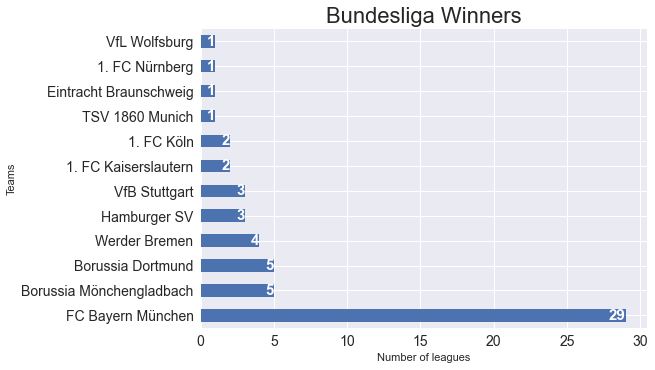

In [21]:
#Plot 
for elem, value in enumerate(champ):
    plt.text(value, elem, str(value), horizontalalignment='right', verticalalignment= 'center', weight= 'bold', color='white', fontsize=15)  
champ.plot(kind='barh')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Bundesliga Winners', fontsize=22)
plt.xlabel('Number of leagues')
plt.ylabel('Teams')

Since 1963, 12 teams have won the Bundesliga.  
As you can see that FC Bayern München is the most dominant club in German Football history with 29 titles!!  
Dortmund and Monchengladbach share the 2nd place and Werder Bremen is 3rd  
Let's try to find out when FC Nürnberg, Eintracht Braunschweig, Wolfsburg and TSV 1860 Munich won the Bundesliga  

![izi life](champions.png)

In [22]:
# Years of the one time champs
unique_champ = ['1. FC Nürnberg','Eintracht Braunschweig', 'VfL Wolfsburg', 'TSV 1860 Munich']
df[(df['position']== 1) & (df['club'].isin(unique_champ))]

,season,position,club,points,played,win,draw,loss,GF,GA,GD,city
32,1965–66,1,TSV 1860 Munich,50,34,20,10,4,80,40,40,Munich
50,1966–67,1,Eintracht Braunschweig,43,34,17,9,8,49,27,22,Braunschweig
68,1967–68,1,1. FC Nürnberg,47,34,19,9,6,71,37,34,Nuremberg
808,2008–09,1,VfL Wolfsburg,69,34,21,6,7,80,41,39,Wolfsburg


In [23]:
# Was some teams INVICIBLE ?
# Years of invicibility
df[df['loss'] ==0]

,season,position,club,points,played,win,draw,loss,GF,GA,GD,city
157,1971–72,18,Arminia Bielefeld,0,0,0,0,0,0,0,0,Bielefeld


Apparently not...  
Arminia Bielefeld were demoted by the DFB for playing a key role in the 1971 match fixing scandal. Their record (6 wins, 7 draws, 21 losses, 41–75 goals, 19 points) was expunged, though their final position would have remained the same

https://en.wikipedia.org/wiki/1971_Bundesliga_scandal

### BUNDESLIGA SECONDS

In [24]:
# 2nd position
second = df[df['position']==2].club.value_counts()
second

FC Bayern München           10
Borussia Dortmund            7
Werder Bremen                7
FC Schalke 04                7
Hamburger SV                 5
1. FC Köln                   5
Bayer Leverkusen             5
VfB Stuttgart                2
Borussia Mönchengladbach     2
Hertha BSC                   1
1. FC Kaiserslautern         1
RB Leipzig                   1
MSV Duisburg                 1
TSV 1860 Munich              1
Alemannia Aachen             1
VfL Wolfsburg                1
Name: club, dtype: int64

Text(0, 0.5, 'Number of times')

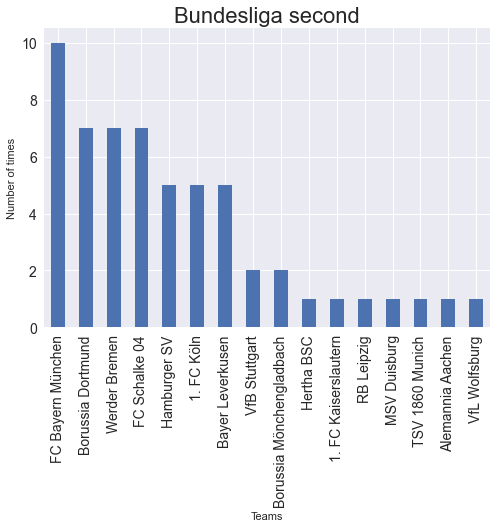

In [25]:
#Plot    
second.plot(kind='bar')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Bundesliga second', fontsize=22)
plt.xlabel('Teams')
plt.ylabel('Number of times')

### EVOLUTION OF THE NUMBER OF TEAMS PER SEASON

Text(0, 0.5, 'Number of teams')

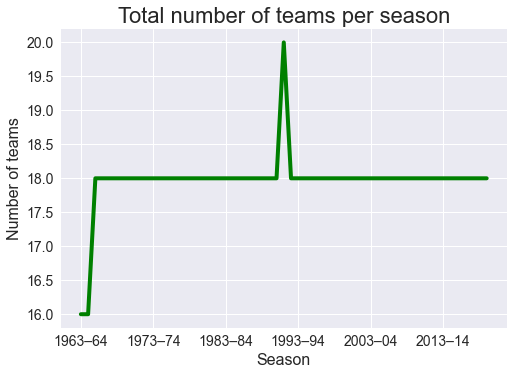

In [26]:
# number of german teams per season
number_clubs = df.groupby('season').count().club
#plot the results using a line plot
number_clubs.plot(linewidth=4, color='g')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#title and labels
plt.title('Total number of teams per season', fontsize=22)
plt.xlabel('Season', fontsize=16)
plt.ylabel('Number of teams', fontsize=16)

The Bundesliga contained most of the time 18 teams every season except for the first one (16) and in 1991-1992: with the incorporation of two teams from former East Germany, the number of clubs was extended to 20, being reduced to the ″traditional″ number of 18 immediately after this one season

### GOALS SCORED THE LAST 10 YEARS

In [27]:
df['season'].unique()

array(['1963–64', '1964–65', '1965–66', '1966–67', '1967–68', '1968–69',
       '1969–70', '1970–71', '1971–72', '1972–73', '1973–74', '1974–75',
       '1975–76', '1976–77', '1977–78', '1978–79', '1979–80', '1980–81',
       '1981–82', '1982–83', '1983–84', '1984–85', '1985–86', '1986–87',
       '1987–88', '1988–89', '1989–90', '1990–91', '1991–92', '1992–93',
       '1993–94', '1994–95', '1995–96', '1996–97', '1997–98', '1998–99',
       '1999–2000', '2000–01', '2001–02', '2002–03', '2003–04', '2004–05',
       '2005–06', '2006–07', '2007–08', '2008–09', '2009–10', '2010–11',
       '2011–12', '2012–13', '2013–14', '2014–15', '2015–16', '2016–17',
       '2017–18', '2018–19', '2019–20'], dtype=object)

Text(0, 0.5, 'Goals')

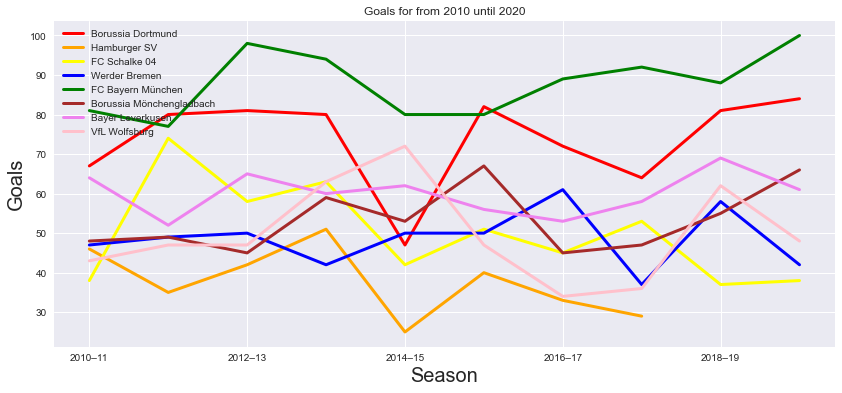

In [28]:
gf = df.pivot(index='season', columns='club', values='GF')
seasons= [ '2010–11','2011–12', '2012–13', '2013–14', '2014–15', '2015–16', '2016–17',
       '2017–18', '2018–19', '2019–20']
teams= ['Borussia Dortmund', 'Hamburger SV',
       'FC Schalke 04', 
       'Werder Bremen',
       'FC Bayern München', 'Borussia Mönchengladbach', 
        'Bayer Leverkusen','VfL Wolfsburg']

colors= ['red', 'orange', 'yellow', 'blue', 'green', 'brown', 'violet', 'pink', 'darkblue']
gf.loc[seasons,teams].plot(linewidth=3, color= colors, figsize=(14,6))
plt.legend(fontsize=10, loc='upper left')
plt.title('Goals for from 2010 until 2020')
plt.xlabel('Season', fontsize=20)
plt.ylabel('Goals', fontsize=20)

The Bundesliga was dominated by Bayern München for the last 10 years: They were those who scored the most and won most of the tournaments

In [29]:
#Overall wins by club since 1963
df.groupby('club').win.describe()

,count,mean,std,min,25%,50%,75%,max
club,,,,,,,,
1. FC Kaiserslautern,44.0,13.045455,3.497205,4.0,10.75,13.0,16.00,19.0
1. FC Köln,48.0,13.312500,3.887548,5.0,10.75,13.0,17.00,22.0
1. FC Nürnberg,33.0,10.424242,3.192083,3.0,8.00,11.0,12.00,19.0
1. FC Saarbrücken,5.0,6.400000,1.516575,5.0,6.00,6.0,6.00,9.0
1899 Hoffenheim,12.0,12.166667,2.622744,8.0,10.75,11.5,15.00,16.0
Alemannia Aachen,4.0,10.750000,4.787136,5.0,8.00,11.0,13.75,16.0
Arminia Bielefeld,17.0,9.000000,3.201562,0.0,8.00,10.0,11.00,12.0
Bayer Leverkusen,41.0,14.682927,3.622423,8.0,12.00,15.0,17.00,21.0
Blau-Weiß 90 Berlin,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0


In [30]:
# 15 Biggest scrorers since 1963
top15gf= df.groupby('club').GF.sum().sort_values(ascending= False).head(15)
top15gf

club
FC Bayern München           4062
Borussia Dortmund           3216
Werder Bremen               3174
Borussia Mönchengladbach    3012
VfB Stuttgart               2969
Hamburger SV                2937
Eintracht Frankfurt         2706
1. FC Köln                  2668
FC Schalke 04               2582
Bayer Leverkusen            2352
1. FC Kaiserslautern        2348
Hertha BSC                  1767
VfL Bochum                  1602
1. FC Nürnberg              1428
Hannover 96                 1385
Name: GF, dtype: int64

Here is above a bigger proof that FC Bayern München is the team with the scored goals ever. Through the decades, they were know for having the world's best strikers and offensive midefielders. Some notable players were :
 - [Gerd Müller](https://en.wikipedia.org/wiki/Gerd_M%C3%BCller): with almost 400 goals after 15 years with Bayern, he won 4 Bundesligas, 3 UEFA Champions Leagues, 1 World Cup (1974). (1970s)
 - [Uli Hoeneß](https://en.wikipedia.org/wiki/Uli_Hoene%C3%9F): 3 Bundesligas, 3 UEFA Champions Leagues, 1 World Cup (1974). (1970s)
 - [Karl-Heinz Rummenigge](https://en.wikipedia.org/wiki/Karl-Heinz_Rummenigge): 162 goals,2 Bundesligas, 2 UEFA Champions Leagues, 2x European Footballer of the year (1980s)
 - [Giovane Élber](https://en.wikipedia.org/wiki/Giovane_%C3%89lber): 4 Bundesligas, 1 UEFA Champions League (2000s)
 - [Bastian Schweinsteiger](https://en.wikipedia.org/wiki/Bastian_Schweinsteiger): 8 Bundesligas, 1 UEFA Champions League, 1 World Cup (2014). (2010s)

### GOALS SCORED AGAINST IN THE LAST 10 YEARS

Text(0, 0.5, 'Goals')

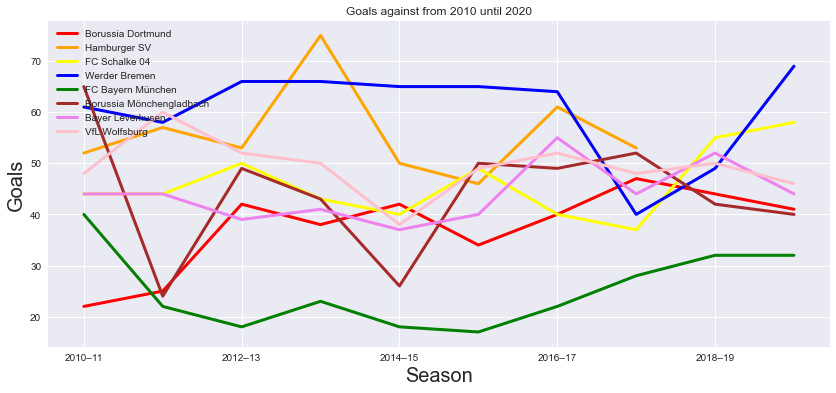

In [31]:
ga = df.pivot(index='season', columns='club', values='GA')
seasons= [ '2010–11',
       '2011–12', '2012–13', '2013–14', '2014–15', '2015–16', '2016–17',
       '2017–18', '2018–19', '2019–20']
teams= ['Borussia Dortmund', 'Hamburger SV',
       'FC Schalke 04', 
       'Werder Bremen',
       'FC Bayern München', 'Borussia Mönchengladbach', 
        'Bayer Leverkusen','VfL Wolfsburg']

colors= ['red', 'orange', 'yellow', 'blue', 'green', 'brown', 'violet', 'pink', 'darkblue']
ga.loc[seasons,teams].plot(linewidth=3, color= colors, figsize=(14,6))
plt.legend(fontsize=10, loc='upper left')
plt.title('Goals against from 2010 until 2020')
plt.xlabel('Season', fontsize=20)
plt.ylabel('Goals', fontsize=20)

In [32]:
# 15 Worst defenses since 1963
top15ga = df.groupby('club').GA.sum().sort_values(ascending=False).head(15)
top15ga

club
Werder Bremen               2778
Eintracht Frankfurt         2680
Hamburger SV                2662
VfB Stuttgart               2628
Borussia Mönchengladbach    2561
Borussia Dortmund           2527
FC Schalke 04               2521
1. FC Köln                  2433
1. FC Kaiserslautern        2344
FC Bayern München           1995
Hertha BSC                  1910
VfL Bochum                  1887
Bayer Leverkusen            1872
1. FC Nürnberg              1794
Hannover 96                 1734
Name: GA, dtype: int64

Werder Bremen, Frankfurt and Hamburg have the worst defense of the Bundesliga history  
Again FC Bayern München with less than 2000 conceded over the years is another hint of how they are strong both in attack and defense zones. Here is a small list of some of their most famous goalkeepers and defenders:
 - [Sepp Maier](https://en.wikipedia.org/wiki/Sepp_Maier): Regarded as one of Germany's greatest goalkeepers, he spent his entire career in Bayern München. 4 Bundesligas, 3 UEFA Champions  League, 1 World Cup(1974). (1970s)
 - [Lothar Matthäus](https://en.wikipedia.org/wiki/Lothar_Matth%C3%A4us): 7 Bundesligas, 1 World Cup (1990). (1980s-1990s)
 - [Oliver Kahn](https://en.wikipedia.org/wiki/Oliver_Kahn): 14 years at the club, 8 Bundesligas, 1 UEFA Champions League. (1990s-2000s)
 - [Philipp Lahm](https://en.wikipedia.org/wiki/Philipp_Lahm): Lahm is considered by many to be one of the best defenders of his generation and one of the greatest defenders of all time. 8 Bundesligas, 1 UEFA Champions League, 1 World Cup (2014). (2000s-2010s)

# BUILDING THE ALL-TIME TABLE


In [33]:
#Number of wins
total_wins= df.groupby('club').win.sum()
total_wins= pd.DataFrame({'Teams': total_wins.index, 'WINS':total_wins.values})
total_wins.head()

,Teams,WINS
0,1. FC Kaiserslautern,574
1,1. FC Köln,639
2,1. FC Nürnberg,344
3,1. FC Saarbrücken,32
4,1899 Hoffenheim,146


In [34]:
#Years in Bundesliga
years= df['club'].value_counts()
years= pd.DataFrame({'Teams':years.index, 'YEARS': years.values}).sort_values(by='Teams')
years.head()

,Teams,YEARS
9,1. FC Kaiserslautern,44
8,1. FC Köln,48
13,1. FC Nürnberg,33
33,1. FC Saarbrücken,5
25,1899 Hoffenheim,12


In [35]:
#number of draws
total_draws= df.groupby('club').draw.sum()
total_draws= pd.DataFrame({'Teams': total_draws.index, 'DRAWS':total_draws.values}).sort_values(by='Teams')
total_draws.head()

,Teams,DRAWS
0,1. FC Kaiserslautern,374
1,1. FC Köln,413
2,1. FC Nürnberg,286
3,1. FC Saarbrücken,48
4,1899 Hoffenheim,119


In [36]:
#Biggest losers
total_losses= df.groupby('club').loss.sum()
total_losses= pd.DataFrame({'Teams': total_losses.index, 'LOSSES':total_losses.values}).sort_values(by='Teams')
total_losses.head()

,Teams,LOSSES
0,1. FC Kaiserslautern,544
1,1. FC Köln,576
2,1. FC Nürnberg,488
3,1. FC Saarbrücken,86
4,1899 Hoffenheim,143


In [37]:
#Number of goals for
total_gf= df.groupby('club').GF.sum()
total_gf= pd.DataFrame({'Teams': total_gf.index, 'TOTAL_GF':total_gf.values}).sort_values(by='Teams')
total_gf.head()

,Teams,TOTAL_GF
0,1. FC Kaiserslautern,2348
1,1. FC Köln,2668
2,1. FC Nürnberg,1428
3,1. FC Saarbrücken,202
4,1899 Hoffenheim,653


In [38]:
#Number of goals against
total_ga= df.groupby('club').GA.sum()
total_ga= pd.DataFrame({'Teams': total_ga.index, 'TOTAL_GA': total_ga.values}).sort_values(by='Teams')
total_ga.head()

,Teams,TOTAL_GA
0,1. FC Kaiserslautern,2344
1,1. FC Köln,2433
2,1. FC Nürnberg,1794
3,1. FC Saarbrücken,336
4,1899 Hoffenheim,624


In [39]:
#Number of games played
total_played= df.groupby('club').played.sum()
total_played= pd.DataFrame({'Teams': total_played.index, 'PLAYED':total_played.values}).sort_values(by='Teams')
total_played.head()

,Teams,PLAYED
0,1. FC Kaiserslautern,1492
1,1. FC Köln,1628
2,1. FC Nürnberg,1118
3,1. FC Saarbrücken,166
4,1899 Hoffenheim,408


In [40]:
#Number of goals diffrence
total_gd= df.groupby('club').GD.sum()
total_gd= pd.DataFrame({'Teams': total_gd.index, 'TOTAL_GD':total_gd.values}).sort_values(by='Teams')
total_gd.head()

,Teams,TOTAL_GD
0,1. FC Kaiserslautern,4
1,1. FC Köln,235
2,1. FC Nürnberg,-366
3,1. FC Saarbrücken,-134
4,1899 Hoffenheim,29


In [41]:
#total titles
total_titles = df[df['position']==1].club.value_counts()
total_titles= pd.DataFrame({'Teams': total_titles.index, 'TITLES':total_titles.values}).sort_values(by='Teams')
total_titles.head()

,Teams,TITLES
6,1. FC Kaiserslautern,2
7,1. FC Köln,2
10,1. FC Nürnberg,1
2,Borussia Dortmund,5
1,Borussia Mönchengladbach,5


In [45]:
# Concatenate all the dataframes
dfs = [df.set_index(['Teams']) for df in [years,total_played, total_wins ,total_draws, total_losses, 
                                          total_gf, total_ga, total_gd, total_titles]]
best= pd.concat(dfs, axis=1).reset_index()
best.head()

,index,YEARS,PLAYED,WINS,DRAWS,LOSSES,TOTAL_GF,TOTAL_GA,TOTAL_GD,TITLES
0,1. FC Kaiserslautern,44,1492,574,374,544,2348,2344,4,2.0
1,1. FC Köln,48,1628,639,413,576,2668,2433,235,2.0
2,1. FC Nürnberg,33,1118,344,286,488,1428,1794,-366,1.0
3,1. FC Saarbrücken,5,166,32,48,86,202,336,-134,NaN
4,1899 Hoffenheim,12,408,146,119,143,653,624,29,NaN


In [46]:
# Adding the winning percentage
best['WIN_PERCENTAGE']= round((best['WINS']/best['PLAYED'])*100, 2)
best.head()

,index,YEARS,PLAYED,WINS,DRAWS,LOSSES,TOTAL_GF,TOTAL_GA,TOTAL_GD,TITLES,WIN_PERCENTAGE
0,1. FC Kaiserslautern,44,1492,574,374,544,2348,2344,4,2.0,38.47
1,1. FC Köln,48,1628,639,413,576,2668,2433,235,2.0,39.25
2,1. FC Nürnberg,33,1118,344,286,488,1428,1794,-366,1.0,30.77
3,1. FC Saarbrücken,5,166,32,48,86,202,336,-134,NaN,19.28
4,1899 Hoffenheim,12,408,146,119,143,653,624,29,NaN,35.78


In [47]:
# Sort the dataframe by number of championships
best.sort_values(by='TITLES', ascending=False, inplace=True)
best['TEAMS']= best['index']
best.drop('index', axis=1, inplace=True)
best= best[['TEAMS','YEARS', 'PLAYED', 'WINS', 'DRAWS', 'LOSSES', 'TOTAL_GF',
       'TOTAL_GA', 'TOTAL_GD', 'TITLES', 'WIN_PERCENTAGE' ]]
best.head(15)

,TEAMS,YEARS,PLAYED,WINS,DRAWS,LOSSES,TOTAL_GF,TOTAL_GA,TOTAL_GD,TITLES,WIN_PERCENTAGE
19,FC Bayern München,54,1840,1100,402,338,4062,1995,2067,29.0,59.78
9,Borussia Dortmund,53,1798,805,460,533,3216,2527,689,5.0,44.77
10,Borussia Mönchengladbach,52,1772,721,462,589,3012,2561,451,5.0,40.69
56,Werder Bremen,56,1900,793,476,631,3174,2778,396,4.0,41.74
26,Hamburger SV,55,1866,746,495,625,2937,2662,275,3.0,39.98
52,VfB Stuttgart,53,1798,741,432,625,2969,2628,341,3.0,41.21
0,1. FC Kaiserslautern,44,1492,574,374,544,2348,2344,4,2.0,38.47
1,1. FC Köln,48,1628,639,413,576,2668,2433,235,2.0,39.25
2,1. FC Nürnberg,33,1118,344,286,488,1428,1794,-366,1.0,30.77
13,Eintracht Braunschweig,21,706,242,177,287,937,1086,-149,1.0,34.28


In [48]:
best['TITLES']= best['TITLES'].replace(np.nan, 0)
best['TITLES']= best['TITLES'].astype(int)
best.head(12) # ALL TIME BEST TEAMS THAT HAVE WON AT LEAST 1 TITLE

,TEAMS,YEARS,PLAYED,WINS,DRAWS,LOSSES,TOTAL_GF,TOTAL_GA,TOTAL_GD,TITLES,WIN_PERCENTAGE
19,FC Bayern München,54,1840,1100,402,338,4062,1995,2067,29,59.78
9,Borussia Dortmund,53,1798,805,460,533,3216,2527,689,5,44.77
10,Borussia Mönchengladbach,52,1772,721,462,589,3012,2561,451,5,40.69
56,Werder Bremen,56,1900,793,476,631,3174,2778,396,4,41.74
26,Hamburger SV,55,1866,746,495,625,2937,2662,275,3,39.98
52,VfB Stuttgart,53,1798,741,432,625,2969,2628,341,3,41.21
0,1. FC Kaiserslautern,44,1492,574,374,544,2348,2344,4,2,38.47
1,1. FC Köln,48,1628,639,413,576,2668,2433,235,2,39.25
2,1. FC Nürnberg,33,1118,344,286,488,1428,1794,-366,1,30.77
13,Eintracht Braunschweig,21,706,242,177,287,937,1086,-149,1,34.28


In [50]:
# Seasons when FC Bayern München were champions
bayern = df[df['club']== 'FC Bayern München']
bayern_champ = bayern[bayern['position']==1]
bayern_champ

,season,position,club,points,played,win,draw,loss,GF,GA,GD,city
86,1968–69,1,FC Bayern München,46,34,18,10,6,61,31,30,Munich
140,1971–72,1,FC Bayern München,55,34,24,7,3,101,38,63,Munich
158,1972–73,1,FC Bayern München,54,34,25,4,5,93,29,64,Munich
176,1973–74,1,FC Bayern München,49,34,20,9,5,95,53,42,Munich
284,1979–80,1,FC Bayern München,50,34,22,6,6,84,33,51,Munich
302,1980–81,1,FC Bayern München,53,34,22,9,3,89,41,48,Munich
374,1984–85,1,FC Bayern München,50,34,21,8,5,79,38,41,Munich
392,1985–86,1,FC Bayern München,49,34,21,7,6,82,31,51,Munich
410,1986–87,1,FC Bayern München,53,34,20,13,1,67,31,36,Munich
446,1988–89,1,FC Bayern München,50,34,19,12,3,67,26,41,Munich


It's interesting to know that since 1963, everytime time the German National Football team won the World Cup (1974, 1990, 2014), FC Bayern München was also champion of the Bundesliga. 

# CONCLUSION

The German league has been clearly dominated by FC Bayern  München most of the time. In the beginning, the league was not as hegemonic as it is today and it was not clearly dominated by any club. From the seventies, FC Bayern  München took control over the league, being Borussia Dortmund his only serious rival. The true historical rivals are FC Nürnberg, TSV 1860 Munich and  FC Kaiserslautern. Dortmund has won 2 of the last 10 championships, in 2010-2011 and 2011-2012. The last time Bayern didn't win the Bundesliga for 2 years was in 1994... And who was the champion for 2 consecutive seasons back then?.... DORTMUND! So to counter that, big players were bought and new coaches were chosen such as Giovanni Trappatoni (1996) or Jupp Heynckes (2011). Nowadays, Bayern  München clearly dominates the Bundesliga, being really hard for other teams to compete against them.

A more plural league would be also a more interesting one. However, in my view, this situation is not likely to change any time soon since. Just after winning its 6th UEFA Champions League, the club will have even more money to be even more powerful and keep the throne in Germany.  

